In [ ]:
# import necessary files
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Reshape
from tensorflow.keras.layers import MaxPooling2D,Flatten
from tensorflow.keras.utils import plot_model

In [ ]:
# Important prerequiste is to match the version of colab with streamlit version of TF
print(tf.__version__)

2.18.0


In [ ]:
# import mnist files
mnist = keras.datasets.mnist

In [ ]:
# break down into training and testing
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize the pixels
x_train,x_test = x_train/255.0, x_test/255.0

In [ ]:
# define the CNN model
model_mnist =Sequential()
model_mnist.add(Reshape((28,28,1),input_shape=(28,28)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# first layer of Convolution
model_mnist.add(Conv2D(32,(3,3),activation='relu'))
model_mnist.add(MaxPooling2D(2,2))
# second layer of Convolution
model_mnist.add(Conv2D(64,(3,3),activation='relu'))
model_mnist.add(MaxPooling2D(2,2))
# flatten the feature maps
model_mnist.add(Flatten())
# first hidden layer
model_mnist.add(Dense(128,activation='relu'))
# output layer
model_mnist.add(Dense(10,activation='softmax'))

In [ ]:
# compiling the model
model_mnist.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# train the model
model_mnist.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.9127 - loss: 0.2814
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9867 - loss: 0.0439
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9906 - loss: 0.0285
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9936 - loss: 0.0207
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9952 - loss: 0.0145


In [ ]:
# save the model
model_mnist.save('/content/drive/MyDrive/ml deep/mnist_new.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


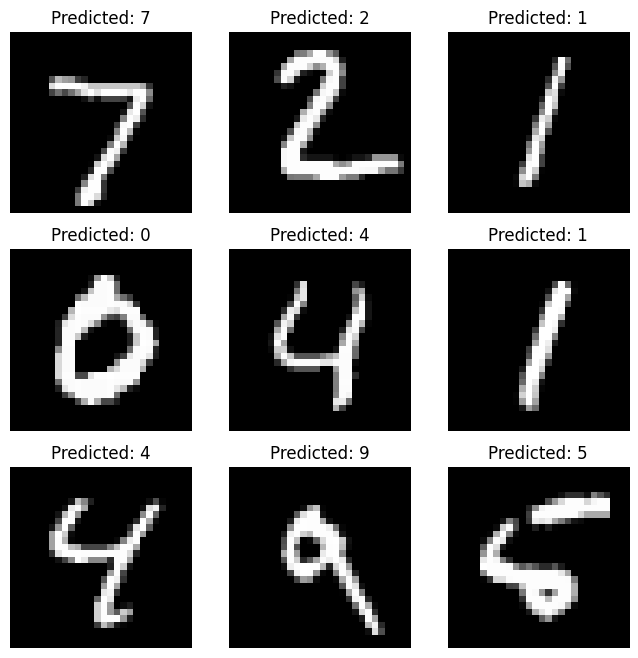

In [ ]:
# Display some images from the test set with predictions
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    img = x_test[i].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    prediction = np.argmax(model_mnist.predict(x_test[i:i+1]))
    ax.set_title(f"Predicted: {prediction}")
    ax.axis('off')

In [ ]:
plt.show()